# Wrangle and Analyze Data

By Amanda Zhou <br>
August 28th, 2020

## Table of Contents
- [Introduction](#intro)
- [Part I - Gather Data](#gather)
- [Part II - Assess Data](#assess)
- [Part III - Clean Data](#clean)
- [Part IV - Analyze and Visualize Data](#AV)
- [Part V - References](#ref)



<a id='into'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. It has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for me to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

My goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required.



<a id='gather'></a>
## Part I - Gather Data


To get started, let's import our libraries.

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

%matplotlib inline

### 1. The WeRateDogs Twitter Archive File

In [299]:
#load and read given twitter archive file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### 2. The	Image Predictions  File

In [300]:
#download programmatically from on Udacity's servers using the Requests library and given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [301]:
#load and read the Image Predictions tsv file
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### 3. The Twitter API File

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions 
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166:

Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440:

Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715:

Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989:

Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264:

In [302]:
#read the tweet_json.txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count

api_dict = []
with open("tweet-json.txt", "r") as file:
    for line in file:
        try: 
            tweet = json.loads(line)           
            api_dict.append({"tweet_id": tweet["id"],
                             "retweet_count": tweet["retweet_count"],
                             "favorite_count": tweet["favorite_count"],})
        except:
            print("Error") 
            
df_api = pd.DataFrame(api_dict, columns = ["tweet_id", "retweet_count", "favorite_count"])
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## Part II - Assess Data

### `df_archive` table

In [303]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
414,822859134160621569,NaN,NaN,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,None,None
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None


In [304]:
df_archive.shape

(2356, 17)

In [305]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [306]:
sum(df_archive.source.duplicated())

2352

In [307]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [308]:
sum(df_archive.expanded_urls.duplicated())

137

**Quality**:
1. Variable tweet_id is an integer not a string
2. Variables in_reply_to_status_id and in_reply_to_user_id are float not string
3. Variables timestamp and retweeted_status_timestamp are object not datetime
4. Variables in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls are missing data
5. Variable source contains HTML code
6. This dataset contains retweets, so it has duplicated data


**Tidiness**: A variable Dog Stage, which includes doggo, floofer, pupper and puppo, can be written in one column instead of four

In [309]:
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Daisy          7
Buddy          7
Toby           7
an             7
Koda           6
Milo           6
Stanley        6
Leo            6
Jax            6
Dave           6
Jack           6
Rusty          6
Oscar          6
Bella          6
Scout          6
Alfie          5
            ... 
Buckley        1
Pherb          1
Kirk           1
Tuck           1
Daniel         1
Sobe           1
Chloe          1
Stormy         1
Alejandro      1
Harnold        1
Travis         1
Tyrus          1
Mutt           1
Pilot          1
Malikai        1
Amélie         1
Sky            1
Jett           1
Bruiser        1
Eevee          1
Ivar           1
Orion          1
Gustav         1
Nigel          1
Lizzie         1
Maisey         1
Koko           1
Sully         

**Quality**:
7. Names are extracted inaccurately, such as "a", "an", “the”, “very”, etc. Looking at their corresponding texts from Excel file, the pattern is that these incorrect names are lowercase and followed by “This is…” or “Here is…”. Otherwise, the output is “None”.

In [310]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [311]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [312]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [313]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [314]:
df_archive.query("doggo == 'None' and floofer == 'None' and pupper == 'None' and puppo == 'None'").sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None


**Quality**:
8. Values in columns doggo, floofer, pupper and puppo are using "None" instead of "NaN"
9. Many dogs have not been classified their stages

In [315]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [316]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [317]:
df_archive.query ('rating_numerator >= rating_denominator').shape[0]

1914

In [318]:
df_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [319]:
df_archive.query('rating_denominator !=  10').shape[0]

23

In [320]:
df_archive.query('rating_denominator !=  10 and rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


**Quality**:
10. There is a large proportion that rating numerator is greater than its denominator, which means dogs were given a rating of 100% and above. That is a unique rating system which is a big part of the popularity of WeRateDogs. However, for those with extreme numerator or denominator, we can make some adjustment for better analysis and consistency.

### `df_image` table

In [321]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False


In [322]:
df_image.shape

(2075, 12)

In [323]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [324]:
df_image.query("p1_dog == False and p2_dog == False and p3_dog == False").sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
203,669749430875258880,https://pbs.twimg.com/media/CUttjYtWcAAdPgI.jpg,1,washbasin,0.245794,False,toilet_seat,0.109420,False,paper_towel,0.105664,False


In [325]:
df_image.query("p1_dog == False and p2_dog == False and p3_dog == False").shape[0]

324

In [326]:
df_image.query("p1_conf < 0.2 and p2_conf < 0.2 and p3_conf < 0.2").shape[0]

164

In [327]:
df_image.query("p1_dog == False and p2_dog == False and p3_dog == False and p1_conf < 0.2 and p2_conf < 0.2 and p3_conf < 0.2").shape[0]

45

In [328]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**Quality**:
1. Missing tweets compared to the 2356 tweets in the `df_archive` table 
2. Variable tweet_id is an integer not a string
3. For consistency, should standardise words in columns p1, p2 and p3 since some are lowercase and others are capitalized
4. Should use space instead of underscore in columns p1, p2 and p3
5. Picture contains the item is not a dog

**Tidiness**: 
1. Image predictions should be combined with `df_archive` table since their information are related to the same tweet
2. Prediction of the dog breed can be obtained based on p1_dog, p2_dog and p3_dog columns, and their level of confidence columns

### `df_api` table

In [329]:
df_api.sample(5)

,tweet_id,retweet_count,favorite_count
2002,672466075045466113,598,1447
348,831650051525054464,2243,7908
511,811744202451197953,1884,8429
2223,668286279830867968,149,535
719,783347506784731136,6533,0


In [330]:
df_api.shape

(2354, 3)

In [331]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [332]:
sum(df_api.tweet_id.duplicated())

0

In [333]:
df_api.tweet_id.nunique()

2354

In [334]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


**Quality**:
1. Missing tweets compared to the 2356 tweets in the `df_archive` table 
2. Variable tweet_id is an integer not a string

**Tidiness**: Variables retweet_count and favorite_count should be part of `df_archive` table since information is extracted from same tweet

### Summary of Assessing Data

#### Quality

##### `df_archive` table
1. Variable tweet_id is an integer not a string
2. Variables in_reply_to_status_id and in_reply_to_user_id are float not string
3. Variables timestamp and retweeted_status_timestamp are objects not datetime
4. Variables in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls are missing data
5. Variable source contains HTML code
6. This dataset contains retweets, so it has duplicated data
7. Names are extracted inaccurately, such as "a", "an", “the”, “very”, etc. Looking at their corresponding texts from Excel file, the pattern is that these incorrect names are lowercase and followed by “This is…” or “Here is…”. Otherwise, the output is “None”.
8. Values in columns doggo, floofer, pupper and puppo are using "None" instead of "NaN"
9. Many dogs have not been classified their stages
10. There is a large proportion that rating numerator is greater than its denominator, which means dogs were given a rating of 100% and above. That is a unique rating system which is a big part of the popularity of WeRateDogs. However, for those with extreme numerator or denominator, we can make some adjustment for better analysis and consistency.

##### `df_image` table
1. Missing tweets compared to the 2356 tweets in the df_archive table
2. Variable tweet_id is an integer not a string
3. For consistency, should standardise words in columns p1, p2 and p3 since some are lowercase and others are capitalized
4. Should use space instead of underscore in columns p1, p2 and p3
5. Picture contains the item is not a dog

##### `df_api` table
1. Missing tweets compared to the 2356 tweets in the df_archive table
2. Variable tweet_id is an integer not a string

#### Tidiness
- In `df_archive` table, a variable Dog Stage, which includes doggo, floofer, pupper and puppo, can be written in one column instead of four
- In `df_image` table, image predictions should be combined with df_archive table since their information are related to the same tweet
- Prediction of the dog breed can be obtained based on p1_dog, p2_dog and p3_dog columns, and their level of confidence columns
- In `df_api` table, variables retweet_count and favorite_count should be part of df_archive table since information is extracted from same tweet

<a id='clean'></a>
## Part III - Clean Data

In [335]:
#make a copy of  all tables before cleaning
archive_clean = df_archive.copy()
image_clean = df_image.copy()
api_clean = df_api.copy()

### Tidiness 1: Combine Columns
### Quality 1: Replace "None" 

#### `treatments`: 
- **In `df_archive` table, a variable Dog Stage, which includes doggo, floofer, pupper and puppo, can be written in one column instead of four**
- **Values in columns doggo, floofer, pupper and puppo are using "None" instead of "NaN"**
- **Many dogs have not been classified their stages**

##### Define
Replace "None" with "" -> create a new column as `dog_stage` which stores the values in those 4 stage columns -> rewrite the value that has multiple stages -> replace "" with "NaN -> drop columns `doggo`, `floofer`, `pupper` and `puppo`

##### Code

In [336]:
#replace all the "None" in columns doggo, floofer, pupper and puppo with ""
archive_clean1 = archive_clean.replace({'doggo': "None", 'floofer': "None", 'pupper': "None", 'puppo': "None"}, "")
archive_clean1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,,,
1322,706291001778950144,NaN,NaN,2016-03-06 01:31:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706291001...,11,10,None,,,,
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from your fav holiday squad! 🎉 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441...,12,10,None,,,pupper,
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,,,,
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,,,,


In [337]:
#create a column dog_stage to store all the values in columns doggo, floofer, pupper and puppo
archive_clean1['dog_stage'] = archive_clean1.doggo + archive_clean1.floofer + archive_clean1.pupper + archive_clean1.puppo


In [338]:
#check and count values in the new column dog_stage
archive_clean1.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [339]:
#for rows that their dog_stage have two stages, i.e. doggopupper, doggopuppo, doggofloofer, separate with "/"
archive_clean1.loc[archive_clean1.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo/pupper'
archive_clean1.loc[archive_clean1.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo/puppo'
archive_clean1.loc[archive_clean1.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo/floofer'

In [340]:
#replace "" in column dog_stage with "NaN"
archive_clean1.dog_stage.replace("", 'NaN', inplace=True)
archive_clean1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,,,,,NaN
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,,,,,NaN
162,860524505164394496,NaN,NaN,2017-05-05 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,,,,,NaN
1244,711743778164514816,NaN,NaN,2016-03-21 02:38:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's calculating the best case...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711743778...,11,10,Roosevelt,,,,,NaN
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,,,,,NaN


In [341]:
#drop columns doggo, floofer, pupper and puppo
archive_clean1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)


##### Test

In [342]:
archive_clean1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
287,838561493054533637,NaN,NaN,2017-03-06 01:26:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. His owner has been watching al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838561493...,13,10,Walter,NaN
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,pupper
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,NaN
1729,679862121895714818,NaN,NaN,2015-12-24 03:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman I'm jus trynna lik the fler"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/679862121...,11,10,None,NaN
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,NaN


In [343]:
archive_clean1.dog_stage.value_counts()

NaN              1976
pupper            245
doggo              83
puppo              29
doggo/pupper       12
floofer             9
doggo/floofer       1
doggo/puppo         1
Name: dog_stage, dtype: int64

### Tidiness 2: Merge 3 DataFrames

#### `treatments`: Combine `archive_clean1`, `df_image` and `df_api` tables into one table as `df_master`

##### Define
Merge 3 DataFrames together with reduce function and based on the key `tweet_id`

##### Code

In [344]:
#import reduce and merge 3 DataFrames together 
from functools import reduce

dfs = [archive_clean1, image_clean, api_clean]
df_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

##### Test

In [345]:
df_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1669,673700254269775872,NaN,NaN,2015-12-07 03:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673700254...,...,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False,638,1532
1507,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,...,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True,6857,12531
1730,672256522047614977,NaN,NaN,2015-12-03 03:30:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Mighty rare dogs here. Long smooth necks. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522...,...,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False,1699,2999
1306,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,...,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True,1128,3348
517,793210959003287553,NaN,NaN,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,...,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True,3301,9997


In [346]:
#use info function to check if all variables have merged
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 n

### Tidiness 3: Create A Dog Breed Column

#### `treatments`: Prediction of the dog breed can be obtained based on p1, p2 and p3 columns, and their level of confidence columns

##### Define
Create a dog breed column based on the confident level which is at least 0.2 (Confidence levels range from 80% to 99%, with the most common confidence level being 95%.), and the True/False statement in p1_dog, p2_dog and p3_dog columns. -> If it meets all the conditions, then return the value in p1, p2 or p3 columns. Otherwise,  return "NaN" -> Then drop redundant columns

##### Code

In [347]:
df_master['breed_pred'] = [df_master['p1'] if df_master.p1_conf > 0.2 and df_master.p1_dog == True
                           else df_master['p2'] if df_master.p2_conf > 0.2 and df_master.p2_dog == True
                           else df_master['p3'] if df_master.p3_conf > 0.2 and df_master.p3_dog == True
                           else np.nan
                           for index, df_master in df_master.iterrows()]


In [348]:
#drop redundant columns
df_master.drop(['p1', 'p1_conf','p1_dog', 'p2', 'p2_conf','p2_dog','p3', 'p3_conf','p3_dog'], axis = 1, inplace=True)


##### Test

In [349]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
retweet_count                 2073 non-null int64
favorite_count                2073 no

### Quality 2&3: Replace Underscore and Capitalize Words

#### `treatments`: 
- **For consistency, should standardise words in columns p1, p2 and p3 since some are lowercase and others are capitalized**
- **Should use space instead of underscore in columns p1, p2 and p3**

##### Define
replace thee underscores with space in the `breed_pred` column -> capitalize each word by using str.title()

##### Code

In [350]:
#check current format
df_master.breed_pred.value_counts()

golden_retriever                  152
Labrador_retriever                 99
Pembroke                           89
Chihuahua                          79
pug                                56
Samoyed                            44
chow                               41
toy_poodle                         39
Pomeranian                         37
malamute                           30
cocker_spaniel                     28
French_bulldog                     27
Chesapeake_Bay_retriever           22
German_shepherd                    20
miniature_pinscher                 20
Staffordshire_bullterrier          19
Siberian_husky                     19
Cardigan                           18
beagle                             17
Rottweiler                         17
Eskimo_dog                         16
Lakeland_terrier                   16
Shetland_sheepdog                  16
kuvasz                             16
Maltese_dog                        16
basset                             15
Shih-Tzu    

In [351]:
#replace "_" with " "
df_master['breed_pred'] = df_master.breed_pred.str.replace("_", " ")


In [352]:
#capitalize each word
df_master['breed_pred'] = df_master['breed_pred'].str.title()


##### Test

In [353]:
df_master.breed_pred.value_counts()

Golden Retriever                  152
Labrador Retriever                 99
Pembroke                           89
Chihuahua                          79
Pug                                56
Samoyed                            44
Chow                               41
Toy Poodle                         39
Pomeranian                         37
Malamute                           30
Cocker Spaniel                     28
French Bulldog                     27
Chesapeake Bay Retriever           22
German Shepherd                    20
Miniature Pinscher                 20
Staffordshire Bullterrier          19
Siberian Husky                     19
Cardigan                           18
Beagle                             17
Rottweiler                         17
Maltese Dog                        16
Kuvasz                             16
Lakeland Terrier                   16
Eskimo Dog                         16
Shetland Sheepdog                  16
Shih-Tzu                           15
Basset      

In [354]:
df_master1 = df_master
df_master1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,breed_pred
1403,683078886620553216,NaN,NaN,2016-01-02 00:14:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a nifty leaping pupper. Feet look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683078886...,9,10,None,pupper,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,634,2176,NaN
779,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,NaN,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,3440,8699,Toy Poodle
793,750117059602808832,NaN,NaN,2016-07-05 00:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calvin. He just loves America so much....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750117059...,10,10,Calvin,NaN,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,1466,4740,Shih-Tzu
1061,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,NaN,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,665,2420,Maltese Dog
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,8538,38818,Pembroke


### Quality 4: Change Datatypes

#### `treatments`: 
- **Variables tweet_id is integer not string, and retweeted_status_id is float not string**
- **Variable timestamp is object not datetime**

##### Define
- Change datatypes of columns `tweet_id` and `retweeted_status_id` to string
- Convert column `timestamp` to datetime

##### Code

In [355]:
df_master1['tweet_id'] = df_master1['tweet_id'].astype(str)
df_master1['retweeted_status_id'] = df_master1['retweeted_status_id'].astype(str)
df_master1['timestamp'] = pd.to_datetime(df_master.timestamp)

##### Test

In [356]:
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           2073 non-null object
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
retweet_count                 2073 non-null int64
favorite_count             

### Quality 5: Remove Retweets

#### `treatments`: Dataset contains retweets, so it has duplicated data

##### Define
Only keep the rows where `retweeted_status_id` is "nan" by dropping others

##### Code

In [357]:
df_master1.retweeted_status_id.value_counts()

nan                  1994
7.90946055509e+17       1
8.00141422402e+17       1
7.0304194965e+17        1
8.19004803108e+17       1
8.37011344667e+17       1
6.91416866452e+17       1
7.89986466051e+17       1
8.15966073409e+17       1
7.33109485276e+17       1
7.12809025986e+17       1
7.11998279773e+17       1
8.47971000004e+17       1
6.73320132811e+17       1
7.79834332597e+17       1
7.575971411e+17         1
8.65013420445e+17       1
7.63837565565e+17       1
7.89530877013e+17       1
7.42423170473e+17       1
8.30583320585e+17       1
8.01167903437e+17       1
8.68880397819e+17       1
7.93286476302e+17       1
8.29374341691e+17       1
6.79158373989e+17       1
7.71770456517e+17       1
6.67548415174e+17       1
7.07610948723e+17       1
7.95076730285e+17       1
                     ... 
7.01214700882e+17       1
8.26958653329e+17       1
7.73547596997e+17       1
7.65222098634e+17       1
7.83334639985e+17       1
8.76850772323e+17       1
7.93962221542e+17       1
6.7535443592

In [358]:
#drop rows where retweeted_status_id is not nan
df_master1.drop(df_master1[df_master1.retweeted_status_id != "nan"].index, inplace=True)
df_master2 = df_master1

##### Test

In [359]:
df_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           1994 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_stage                     1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
retweet_count                 1994 non-null int64
favorite_count               

In [360]:
df_master2.retweeted_status_id.value_counts()

nan    1994
Name: retweeted_status_id, dtype: int64

### Quality 6: Missing and Unnecessary Data

#### `treatments`: Variables in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are missing data

##### Define
Since retweets are removed, columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` should be removed from the dataset. Columns `in_reply_to_status_id` and `in_reply_to_user_id` are not necessary for analysis, which can be removed.

##### Code

In [361]:
df_master2.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
               axis = 1, inplace = True)
df_master3 = df_master2

##### Test

In [362]:
df_master3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
breed_pred            1416 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


### Quality 7: Remove HTML Code

#### `treatments`: Variable source contains HTML code

##### Define
In column `source`, check how many sources to get these tweets -> observe their patterns fron the given link -> split and get corresponding source information

##### Code

In [363]:
df_master3.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [364]:
df_master_split = df_master3["source"].str.split('>(.*?)<', expand = True)
df_master_split.head()

,0,1,2
0,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,/a>
1,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,/a>
2,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,/a>
3,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,/a>
4,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,/a>


In [365]:
df_master3["source"] = df_master_split[1]

##### Test

In [366]:
df_master3.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [367]:
df_master3.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,breed_pred
2017,667062181243039745,2015-11-18 19:29:52,Twitter for iPhone,This is Keet. He is a Floridian Amukamara. Abs...,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,NaN,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,57,227,Chesapeake Bay Retriever
451,803380650405482500,2016-11-28 23:30:47,Twitter for iPhone,Meet Sonny. He's an in-home movie critic. That...,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,NaN,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,2169,8601,NaN
809,749036806121881602,2016-07-02 00:27:45,Twitter for iPhone,This is Dietrich. He hops at random. Other dog...,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,NaN,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,896,3425,NaN
1856,670061506722140161,2015-11-27 02:08:07,Twitter for iPhone,This is Liam. He has a particular set of skill...,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,NaN,https://pbs.twimg.com/media/CUyJYk1WoAMPROb.jpg,1,373,822,Italian Greyhound
462,801285448605831168,2016-11-23 04:45:12,Twitter for iPhone,oh h*ck 10/10 https://t.co/bC69RrW559,https://twitter.com/dog_rates/status/801285448...,10,10,None,NaN,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,960,6802,NaN


### Quality 8: Replace inaccurate name

#### `treatments`: Names are extracted inaccurately, such as "a", "an", “the”, “very”, etc. Looking at their corresponding texts from Excel file, the pattern is that these incorrect names are lowercase and followed by “This is…” or “Here is…”. Otherwise, the output is “None”

##### Define
Find out all lowercase names -> replace them with "NaN" -> replace "None" with "NaN"

##### Code

In [368]:
names_lower = df_master3[df_master3.name.str.islower()].name
names_lower.value_counts()

a               55
the              7
an               6
one              4
very             4
quite            3
just             3
getting          2
my               1
incredibly       1
all              1
this             1
officially       1
his              1
actually         1
unacceptable     1
such             1
by               1
not              1
space            1
light            1
infuriating      1
Name: name, dtype: int64

In [369]:
df_master3.name.replace(names_lower, np.nan, inplace=True)
df_master3.name.replace('None', np.nan, inplace=True)

##### Test

In [370]:
# incorrect names and None have been removed
df_master3.name.value_counts()

Charlie      11
Lucy         10
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Daisy         7
Toby          7
Bella         6
Jax           6
Stanley       6
Koda          6
Bo            6
Louis         5
Dave          5
Leo           5
Oscar         5
Rusty         5
Milo          5
Scout         5
Buddy         5
Bailey        5
Chester       5
Dexter        4
Maggie        4
Clarence      4
George        4
             ..
Rinna         1
Eazy          1
Obie          1
Sparky        1
Harper        1
Maisey        1
Stormy        1
Nollie        1
Ralf          1
Ike           1
Leonard       1
Tonks         1
Pawnd         1
Remus         1
Harnold       1
Travis        1
Tyrus         1
Mutt          1
Pilot         1
Nigel         1
Malikai       1
Amélie        1
Sky           1
Filup         1
Alejandro     1
Bruiser       1
Ivar          1
Orion         1
Gustav        1
Shiloh        1
Name: name, Length: 913,

### Quality 9: Standardize Rating

#### `treatments`: There is a large proportion that rating numerator is greater than its denominator, which means dogs were given a rating of 100% and above. That is a unique rating system which is a big part of the popularity of WeRateDogs. However, for those with extreme numerator or denominator, we can make some adjustment for better analysis and consistency.

##### Define
Find out all rows that rating_denominator is not 10 -> adjust their numerator by multiplying (10/their denominators) -> replace their numerators and denominators with adjusted numbers and 10s respectively

##### Code

In [371]:
#Find out all rows that rating_denominator is not 10
den_not10 = df_master3.query('rating_denominator !=  10')
den_not10.rating_denominator

345      70
415       7
734     150
876      11
924     170
967      20
1001     50
1022     90
1047     80
1065     50
1131     50
1207     40
1379    130
1380    110
1405     11
1512    120
1571     80
2052      2
Name: rating_denominator, dtype: int64

In [372]:
den_not10.shape[0]

18

In [373]:
#view their numeratiors
den_not10.rating_numerator

345      84
415      24
734     165
876       9
924     204
967       4
1001     50
1022     99
1047     80
1065     45
1131     60
1207     44
1379    143
1380    121
1405      7
1512    144
1571     88
2052      1
Name: rating_numerator, dtype: int64

In [374]:
#for testing purpose: calculate their original rate before adjustment
rate_before = (den_not10.rating_numerator/den_not10.rating_denominator).astype(int)
rate_before

345     1
415     3
734     1
876     0
924     1
967     0
1001    1
1022    1
1047    1
1065    0
1131    1
1207    1
1379    1
1380    1
1405    0
1512    1
1571    1
2052    0
dtype: int64

In [375]:
#adjust their numerator by multiplying (10/their denominators)
adj_num = (10/den_not10.rating_denominator*den_not10.rating_numerator).astype(int)
adj_num

345     12
415     34
734     11
876      8
924     12
967      2
1001    10
1022    11
1047    10
1065     9
1131    12
1207    11
1379    11
1380    11
1405     6
1512    12
1571    11
2052     5
dtype: int64

In [376]:
import warnings 
warnings.filterwarnings("ignore")

den_not10.loc[:, 'rating_numerator']= adj_num
den_not10.rating_numerator

345     12
415     34
734     11
876      8
924     12
967      2
1001    10
1022    11
1047    10
1065     9
1131    12
1207    11
1379    11
1380    11
1405     6
1512    12
1571    11
2052     5
Name: rating_numerator, dtype: int64

In [377]:
#for testing purpose: calculate their rate after adjustment (divided by 10)
rate_after =  (den_not10.rating_numerator/10).astype(int)
rate_after

345     1
415     3
734     1
876     0
924     1
967     0
1001    1
1022    1
1047    1
1065    0
1131    1
1207    1
1379    1
1380    1
1405    0
1512    1
1571    1
2052    0
Name: rating_numerator, dtype: int64

In [378]:
#check if rate_before is equal to rate_after -> should be all true
print (rate_before == rate_after)

345     True
415     True
734     True
876     True
924     True
967     True
1001    True
1022    True
1047    True
1065    True
1131    True
1207    True
1379    True
1380    True
1405    True
1512    True
1571    True
2052    True
dtype: bool


In [379]:
#convert numerators to the adjusted numbers in df_master2
df_master3.loc[df_master2.rating_denominator !=  10, 'rating_numerator']= adj_num


##### Test

In [380]:
#check numerator if changed
df_master3.query('rating_denominator !=  10').rating_numerator

345     12
415     34
734     11
876      8
924     12
967      2
1001    10
1022    11
1047    10
1065     9
1131    12
1207    11
1379    11
1380    11
1405     6
1512    12
1571    11
2052     5
Name: rating_numerator, dtype: int64

##### Code

In [381]:
#replace denominators with 10s
df_master3.rating_denominator.replace(den_not10.rating_denominator, 10, inplace=True)

##### Test

In [382]:
#check denominators -> should be only one value which is 10 
df_master3.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

### Rearrange Columns

In [383]:
df_master3.shape

(1994, 14)

In [384]:
df_master3.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'retweet_count', 'favorite_count', 'breed_pred'],
      dtype='object')

In [385]:
df_master3 = df_master3[['tweet_id', 'timestamp', 'source', 'retweet_count', 'favorite_count',
                         'name', 'dog_stage', 'breed_pred', 'rating_numerator', 'rating_denominator', 
                         'text', 'expanded_urls', 'jpg_url', 'img_num' ]]

In [386]:
df_final = df_master3

In [387]:
df_final.head()

,tweet_id,timestamp,source,retweet_count,favorite_count,name,dog_stage,breed_pred,rating_numerator,rating_denominator,text,expanded_urls,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,8853,39467,Phineas,NaN,NaN,13,10,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,6514,33819,Tilly,NaN,Chihuahua,13,10,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,4328,25461,Archie,NaN,Chihuahua,12,10,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,8964,42908,Darla,NaN,NaN,13,10,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,9774,41048,Franklin,NaN,Basset,12,10,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


### Store Data

In [388]:
df_final.to_csv('twitter_archive_master.csv', index = False)

<a id='AV'></a>
## Part IV - Analyze and Visualize Data

In [389]:
#load dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,retweet_count,favorite_count,name,dog_stage,breed_pred,rating_numerator,rating_denominator,text,expanded_urls,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,8853,39467,Phineas,NaN,NaN,13,10,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,6514,33819,Tilly,NaN,Chihuahua,13,10,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,4328,25461,Archie,NaN,Chihuahua,12,10,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,8964,42908,Darla,NaN,NaN,13,10,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,9774,41048,Franklin,NaN,Basset,12,10,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
name                  1350 non-null object
dog_stage             306 non-null object
breed_pred            1416 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
text                  1994 non-null object
expanded_urls         1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
dtypes: int64(6), object(8)
memory usage: 218.2+ KB


In [391]:
df.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.0,1994.000000
mean,7.358508e+17,2766.753260,8895.725677,11.692076,10.0,1.203109
std,6.747816e+16,4674.698447,12213.193181,40.670663,0.0,0.560777
min,6.660209e+17,16.000000,81.000000,0.000000,10.0,1.000000
25%,6.758475e+17,624.750000,1982.000000,10.000000,10.0,1.000000
50%,7.084748e+17,1359.500000,4136.000000,11.000000,10.0,1.000000
75%,7.877873e+17,3220.000000,11308.000000,12.000000,10.0,1.000000
max,8.924206e+17,79515.000000,132810.000000,1776.000000,10.0,4.000000


In [392]:
df.shape

(1994, 14)

### Finding 1: Relationship Between Retweet Count and Favorite Count

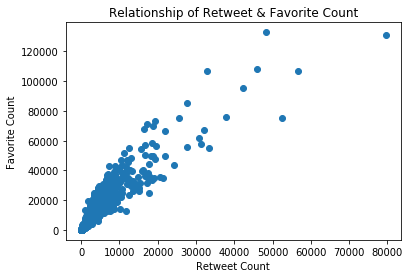

In [393]:
plt.scatter(df.retweet_count, df.favorite_count)

plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Relationship of Retweet & Favorite Count');


#### From the plot, it shows a highly linear postive relationship between Retweet Count and Favorite Count.

### Finding 2: Top 10 Predicted Dog Breeds

In [394]:
df.breed_pred.value_counts()[0:10].sort_values(ascending=False)

Golden Retriever      140
Labrador Retriever     94
Pembroke               89
Chihuahua              75
Pug                    53
Samoyed                40
Chow                   39
Toy Poodle             38
Pomeranian             37
Malamute               29
Name: breed_pred, dtype: int64

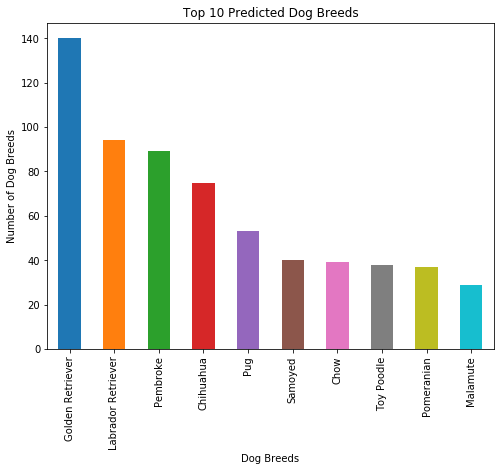

In [395]:
df.breed_pred.value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', figsize=(8, 6))
plt.xlabel('Dog Breeds')
plt.ylabel('Number of Dog Breeds')
plt.title('Top 10 Predicted Dog Breeds');


#### From the chart, Golden Retriever has the highest number, following by Labrador Retriever and Pembroke.

### Finding 3: Dog Breed and Retweet and Favorite Counts

In [396]:
df_count = df[['breed_pred','retweet_count','favorite_count']]
df_count.head()

,breed_pred,retweet_count,favorite_count
0,NaN,8853,39467
1,Chihuahua,6514,33819
2,Chihuahua,4328,25461
3,NaN,8964,42908
4,Basset,9774,41048


In [397]:
df_count.sort_values('retweet_count', ascending = False).head(3)

,breed_pred,retweet_count,favorite_count
775,Labrador Retriever,79515,131075
400,Chihuahua,56625,107015
810,Eskimo Dog,52360,75163


In [398]:
df_count.sort_values('favorite_count', ascending = False).head(3)

,breed_pred,retweet_count,favorite_count
309,NaN,48265,132810
775,Labrador Retriever,79515,131075
58,English Springer,45849,107956


#### By checking each tweet, the one has the most retweet counts and favorite counts is Labrador Retriever.

In [399]:
#view the sum of retweet and favorite counts for each dog breed
df_count_sum = df[['breed_pred','retweet_count','favorite_count']].groupby('breed_pred').sum()
df_count_sum.head()

,retweet_count,favorite_count
breed_pred,,
Afghan Hound,16035,44902
Airedale,15933,61945
American Staffordshire Terrier,28664,98274
Appenzeller,2916,14635
Australian Terrier,6157,22255


In [400]:
#check which Top 3 breed have the most retweet_count
df_count_sum.sort_values('retweet_count', ascending = False).head(3)

,retweet_count,favorite_count
breed_pred,,
Golden Retriever,484238,1677881
Labrador Retriever,366440,1123354
Pembroke,281669,1001934


In [401]:
#check which Top 3 breed have the most favorite_count
df_count_sum.sort_values('favorite_count', ascending = False).head(3)

,retweet_count,favorite_count
breed_pred,,
Golden Retriever,484238,1677881
Labrador Retriever,366440,1123354
Pembroke,281669,1001934


#### By checking the sum of each dog breed, the one has the most retweet counts and favorite counts is Golden Retriever.

In [402]:
#view the mean of retweet and favorite counts for each dog breed
df_count_mean = df[['breed_pred','retweet_count','favorite_count']].groupby('breed_pred').mean()
df_count_mean.head()

,retweet_count,favorite_count
breed_pred,,
Afghan Hound,8017.500000,22451.000000
Airedale,1448.454545,5631.363636
American Staffordshire Terrier,2204.923077,7559.538462
Appenzeller,1458.000000,7317.500000
Australian Terrier,3078.500000,11127.500000


In [403]:
#check which Top 3 breed have the most retweet_count
df_count_mean.sort_values('retweet_count', ascending = False).head(3)

,retweet_count,favorite_count
breed_pred,,
Afghan Hound,8017.500000,22451.000000
Standard Poodle,6631.857143,15786.000000
English Springer,5973.555556,15657.222222


In [404]:
#check which Top 3 breed have the most favorite_count
df_count_mean.sort_values('favorite_count', ascending = False).head(3)

,retweet_count,favorite_count
breed_pred,,
Saluki,5133.750000,24060.00000
Afghan Hound,8017.500000,22451.00000
French Bulldog,4576.185185,17468.37037


#### By checking the mean of each dog breed, the one has the most retweet counts is Afghan Hound, and has the most favorite counts is Saluki. 

#### In conclusion, when checking each simple tweet,  Labrador Retriever is the one has the most retweet counts and favorite counts. When looking at the sum of retweet counts and favorite counts for each dog breed, Golden Retriever has the most in both, then it is Labrador Retriever. However, when checking by the mean of retweet counts and favorite counts for each dog breed, the result has big difference due to sample sizes of each bread are different.

### Finding 4: Dog Breed and Rating

In [405]:
df_rate = df[['breed_pred','rating_numerator']]
df_rate.sort_values('rating_numerator', ascending = False).head(10)

,breed_pred,rating_numerator
726,NaN,1776
1718,NaN,420
503,Pomeranian,75
385,Golden Retriever,34
553,Clumber,27
1374,Kuvasz,26
113,NaN,14
399,Golden Retriever,14
95,NaN,14
455,NaN,14


In [406]:
df_rate.sort_values('rating_numerator', ascending = False).tail(5)

,breed_pred,rating_numerator
1900,NaN,1
1976,NaN,1
1519,NaN,1
756,NaN,0
235,NaN,0


In [407]:
df_rate_sum = df[['breed_pred','rating_numerator']].groupby('breed_pred').sum()
df_rate_sum.sort_values('rating_numerator', ascending = False).head(5)

,rating_numerator
breed_pred,
Golden Retriever,1636
Labrador Retriever,1045
Pembroke,1014
Chihuahua,804
Pug,544


In [408]:
df_rate_mean = df[['breed_pred','rating_numerator']].groupby('breed_pred').mean()
df_rate_mean.sort_values('rating_numerator', ascending = False).head(10)

,rating_numerator
breed_pred,
Clumber,27.000000
Afghan Hound,13.000000
Pomeranian,12.891892
Saluki,12.500000
Briard,12.333333
Tibetan Mastiff,12.250000
Kuvasz,12.062500
Standard Schnauzer,12.000000
Toy Terrier,12.000000


#### As we know that all the denominators are 10, if the numerator is equal to or greater than 10, it means the dog is given a rating of above 100% overall.  From the analysis above, the mean of rating_numerator is 11.692076, and majority of dog breads have  a high rating (i.e. rating_numerator is at least 10 or overall above 100% ). Even though there are few outliers in the dataset, we can neglect it at this moment. In general, Golden Retriever and Labrador Retriever are given a good rating.

<a id='ref'></a>
## Part V - References


1.	https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
2.	https://www.kite.com/python/answers/how-to-replace-spaces-with-underscores-in-python#:~:text=Use%20str.,spaces%20with%20underscores%20in%20str%20.
3.	https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
4.	https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
5.	https://stackoverflow.com/questions/27881366/regular-expressions-and
6.	https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings